In [1]:
%matplotlib widget 

import os
import sys
import trimesh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection 
sys.dont_write_bytecode = True
import constants as C
#################################################
####### Enter Asteroid Name & Update Here #######
Asteroid_Name = 'Apophis'
target = C.apophis()
##################################################
########### Load File ############################
# Shape model File 
Aster_File_OBJ  =  Asteroid_Name + ".obj"
# volInt.c Model
cm_vol    = np.loadtxt(Asteroid_Name + "_CM.in", delimiter=' ')
mu_I_vol  = np.loadtxt(Asteroid_Name + '_mu.in', delimiter=' ')
# Trimesh Model
cm_tri    = np.loadtxt(Asteroid_Name + "tri_CM.in", delimiter=' ')
mu_I_tri  = np.loadtxt(Asteroid_Name + 'tri_mu.in', delimiter=' ')
##################################################################


# volInt.c Model

- Center of mass for the polyhedron was calculated by `volInt.c` 

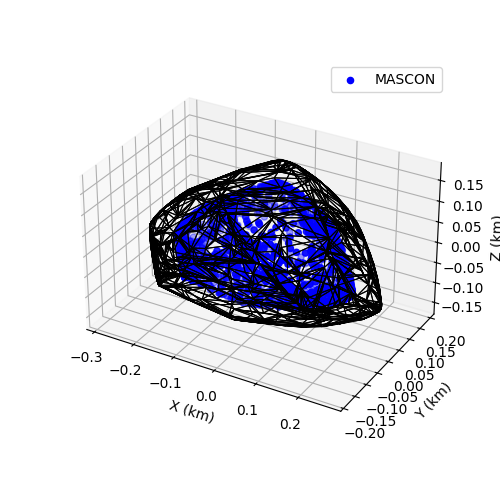

In [2]:
# Load the shape model using trimesh
gamma = target.gamma
mesh  = trimesh.load_mesh(Aster_File_OBJ)
##############################
mesh.apply_scale(gamma)
V = mesh.vertices
F = mesh.faces
Asteroid_Mesh = Poly3DCollection([V[ii] for ii in F], 
                edgecolor='black',
                facecolors="white",
                linewidth=0.75,
                alpha=0.0)
figure = plt.figure(figsize=(5,5))
ax   = figure.add_subplot(projection='3d')

ax.scatter(cm_vol[:,0], 
           cm_vol[:,1], 
           cm_vol[:,2], 
           c='blue',
           label="MASCON")



ax.add_collection3d(Asteroid_Mesh)


ax.set_aspect('equal', 'box') 
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.legend()
plt.show()

# Trimesh Model

- Center of mass for the polyhedron was calculated by the `trimesh` Python package  

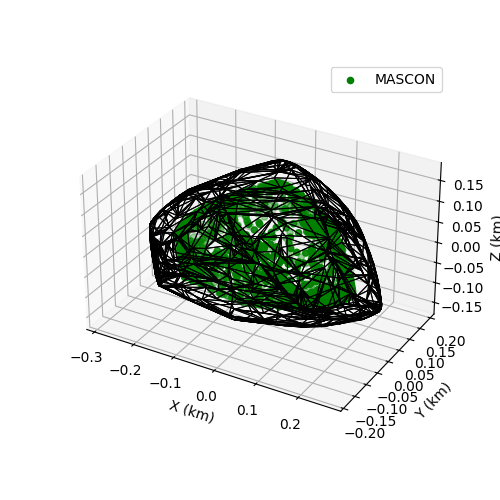

In [3]:
figure = plt.figure(figsize=(5,5))
ax   = figure.add_subplot(projection='3d')

ax.scatter(cm_tri[:,0], 
           cm_tri[:,1], 
           cm_tri[:,2], 
           c='green',
           label="MASCON")
mesh2 = Poly3DCollection([V[ii] for ii in F], 
                edgecolor='black',
                facecolors="white",
                linewidth=0.75,
                alpha=0.0)

ax.add_collection3d(mesh2)


ax.set_aspect('equal', 'box') 
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.legend()
plt.show()

# Gravitational parameters

- Saved as scaled using the given gamma found during modeling

- both are $\approx 3.54\times 10^{-9}~\frac{km^3}{s^2}$

In [31]:
out = f""" 
| Scaling Factor: {gamma} 
| mu - volInt.c:  {np.sum(mu_I_vol)} km^3/s^2
| mu - trimesh:   {np.sum(mu_I_tri)} km^3/s^2
"""
print(out)

 
| Scaling Factor: 0.2848196900000026 
| mu - volInt.c:  3.5439463859488244e-09 km^3/s^2
| mu - trimesh:   3.544052585927348e-09 km^3/s^2

